In [1]:
# 读取数据
import os
import pandas as pd

df=pd.read_excel('心肺运动试验总表.xlsx', engine='openpyxl')

CDD1 = df.copy()

In [3]:
# 手动选特征
import numpy as np
# 删除重复的 '手机' 列数据，只保留第一次出现的行
df = df.drop_duplicates(subset=['手机'], keep='first')
selected_columns = [
    'Age',
    'Sex',
    'Weight',
    'Height',
    '卧位心室率',
    '峰值心率',
    '峰值功率',
    '峰值氧脉',
    # 'ΔV02/ΔWR',全缺失 不要
    'VE/VCO2斜率.1',
    '静息血压-收缩压',
    '静息血压-舒张压',
    'FVC',
    'VCmax',
    'FEV1',
    'FEV1/FVC',
    'MVV',
    '运动中最高收缩压',
    '运动终止后3分钟收缩压',
    '运动中最高舒张压',
    '运动终止后3分钟舒张压',
    '运动终止后1分钟心率',
    '运动终止后2分钟心率',
    '运动终止后3分钟心率',
    '峰值氧耗',
    '峰值公斤氧耗',
    '峰值分钟通气量',
    '呼吸商',
    '每分钟通气量(毫升)',
    'load-maxload',
    'VO2-AT',
    'VCO2-AT',
    'VCO2-Max.Load',
    'VCO2/kg-AT',
    'VCO2/kg-Max.Load',
    'HR-AT',
    'HR-Max.Load',
    'BPsys-AT',
    'BPsys-Max.Load',
    'BPdia_AT',
    'BPdia-Max.Load',
    'VE-AT',
    'VT-AT',
    'f-ergo-AT',
    'BR-AT',
    # 'VD/VT-AT',
    # 'VD/VT-Max.Load',
    'EQO2-Max.Load',
    'EQCO2-Max.Load',
    'PETO2-AT',
    'PETO2-Max.Load',
    'PETCO2-AT',
    'PETCO2-Max.Load',
    'MAX BP*HR',
    'Threshold Power'
]

df = df[selected_columns]

In [4]:
# 手动清洗数据
# 将所有0值、非数值标记为缺失，统一转换为数值型
import pandas as pd
import numpy as np

# 示例数据（你可以用自己的 df = pd.read_csv(...) 替换）
# df = pd.read_csv('你的文件路径.csv')

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)
# 删除所有 Age 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# 打印删除的行数
print(f"删除的行数：{rows_dropped}")
# 性别转换
df['Sex'] = df['Sex'].map({'男': 1, '女': 0})
df = df.apply(pd.to_numeric, errors='coerce')


转换失败的列及其数量：
列 'Age': 1 个值转换失败
列 '卧位心室率': 1 个值转换失败
列 '峰值氧脉': 1 个值转换失败
列 'VE/VCO2斜率.1': 184 个值转换失败
列 '静息血压-收缩压': 143 个值转换失败
列 '静息血压-舒张压': 143 个值转换失败
列 '运动中最高收缩压': 29 个值转换失败
列 '运动中最高舒张压': 29 个值转换失败
列 '峰值氧耗': 1 个值转换失败
列 '峰值公斤氧耗': 1 个值转换失败
列 '呼吸商': 1 个值转换失败
列 'VO2-AT': 1 个值转换失败
列 'VCO2/kg-AT': 1 个值转换失败
列 'HR-AT': 1 个值转换失败
列 'BPsys-AT': 42 个值转换失败
列 'BPsys-Max.Load': 29 个值转换失败
列 'BPdia_AT': 42 个值转换失败
列 'BPdia-Max.Load': 29 个值转换失败
列 'VE-AT': 1 个值转换失败
列 'VT-AT': 1 个值转换失败
列 'BR-AT': 1 个值转换失败
列 'PETO2-AT': 1 个值转换失败
列 'PETCO2-AT': 1 个值转换失败
列 'MAX BP*HR': 39 个值转换失败
列 'Threshold Power': 14 个值转换失败
删除的列名：
Index([], dtype='object')
删除的行数：1


In [5]:
# 手动处理异常格式数据
# 将所有0值、非数值标记为缺失，统一转换为数值型
import pandas as pd
import numpy as np

# 示例数据（你可以用自己的 df = pd.read_csv(...) 替换）
# df = pd.read_csv('你的文件路径.csv')

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)
# 删除所有 Age 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# 打印删除的行数
print(f"删除的行数：{rows_dropped}")
df = df.apply(pd.to_numeric, errors='coerce')

所有列均成功转换，无失败值。
删除的列名：
Index([], dtype='object')
删除的行数：0


In [6]:
# 中位数填充、Lasso特征选择、基模型比较筛选、相关性矩阵、组合推荐
# 这里先进行特征选择是之前试过两次单独拟合所有模型，发现变量冗余非常严重，反正后面做也是一样的
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import make_pipeline

# 模型
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

try:
    from xgboost import XGBRegressor
except ImportError:
    XGBRegressor = None

try:
    from lightgbm import LGBMRegressor
except ImportError:
    LGBMRegressor = None

# ============ Step 1：中位数插补 =============
df_all = df.copy()
X = df_all.drop(columns=["Age"])
y = df_all["Age"]

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ============ Step 2：标准化 =============
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# ============ Step 3：Lasso 特征选择 =============
lasso_selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=42), threshold='mean')
lasso_selector.fit(X_scaled, y)
selected_features = X_scaled.columns[lasso_selector.get_support()]
X_final = X_scaled[selected_features]
print(f"✅ Lasso选择了 {len(selected_features)} 个特征：\n{selected_features.tolist()}")

# ============ Step 4：定义基模型 =============
models = {
    "Ridge": make_pipeline(StandardScaler(), Ridge()),
    "Lasso": make_pipeline(StandardScaler(), Lasso()),
    "ElasticNet": make_pipeline(StandardScaler(), ElasticNet()),
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNN": make_pipeline(StandardScaler(), KNeighborsRegressor()),
    "SVR": make_pipeline(StandardScaler(), SVR()),
    "MLP": make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000)),
}

if XGBRegressor:
    models["XGBoost"] = XGBRegressor()
if LGBMRegressor:
    models["LightGBM"] = LGBMRegressor()

# ============ Step 5：模型交叉验证 + 预测保存 =============
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

results = {}
predictions = {}

for name, model in models.items():
    scores = cross_val_score(model, X_final, y, scoring=scorer, cv=cv)
    rmse_scores = np.sqrt(-scores)
    results[name] = rmse_scores.mean()

    model.fit(X_final, y)
    predictions[name] = model.predict(X_final)

# ============ Step 6：输出结果 =============
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["CV_RMSE"])
results_df.sort_values("CV_RMSE", inplace=True)
print("\n🔍 各模型 CV RMSE 排名：")
print(results_df)

# ============ Step 7：计算预测相关性矩阵 =============
pred_df = pd.DataFrame(predictions)
correlation_matrix = pred_df.corr()
print("\n🔗 模型预测相关性矩阵：")
print(correlation_matrix)

# ============ Step 8：推荐组合辅助（低相关性 + 高性能） ============
top_models = results_df.index[:5]
low_corr_pairs = correlation_matrix.loc[top_models, top_models] < 0.9

print("\n✅ 推荐组合模型（性能好 + 差异大）：")
for i in top_models:
    for j in top_models:
        if i != j and low_corr_pairs.loc[i, j]:
            print(f"{i} + {j}")


✅ Lasso选择了 20 个特征：
['Sex', '峰值心率', '峰值功率', 'FEV1', '峰值氧耗', '峰值分钟通气量', '每分钟通气量(毫升)', 'load-maxload', 'VCO2-AT', 'VCO2/kg-AT', 'VCO2/kg-Max.Load', 'HR-AT', 'BPsys-AT', 'VE-AT', 'f-ergo-AT', 'BR-AT', 'EQCO2-Max.Load', 'PETO2-AT', 'PETCO2-AT', 'PETCO2-Max.Load']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3147
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 20
[LightGBM] [Info] Start training from score 44.404183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3140
[LightGBM] [Info] Number of data points in the train set: 2057, number of used features: 20
[LightGBM] [Info] Start training from score 44.308702
[LightGBM] [Info] Auto-choosing col-wise multi-threading,


🌟 Stacking 模型 CV RMSE: 9.165


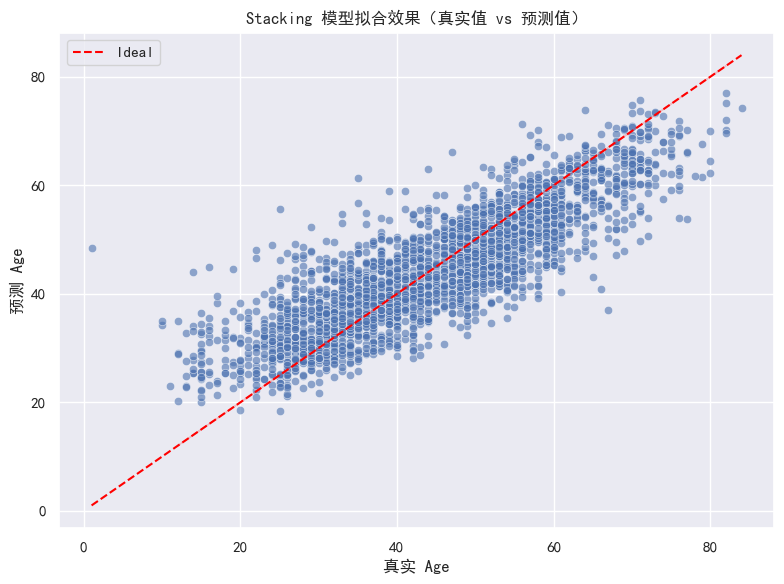

In [7]:
# 堆叠模型确定、训练、检验（先5折交叉验证再整体拟合）
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Step 1：定义基模型 + 次级模型
base_models = [
    ('ridge', Ridge()),
    ('lgb', LGBMRegressor()),
    ('svr', SVR())
]
final_model = Ridge()  # 次级模型（也可以换成 GBDT、Lasso）

# ✅ Step 2：堆叠回归器
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    passthrough=False,  # 若需让次级模型也接收原始特征，则设为 True
    cv=5,
    n_jobs=-1
)

# ✅ Step 3：交叉验证评估（5折）
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = np.sqrt(-cross_val_score(stack_model, X_final, y, 
                                   scoring="neg_mean_squared_error", cv=cv)).mean()
print(f"\n Stacking 模型 CV RMSE: {cv_rmse:.3f}")

# ✅ Step 4：整体拟合 & 预测
stack_model.fit(X_final, y)
y_pred = stack_model.predict(X_final)

#🌟🌟🌟sns也可能出现中文不显示的问题，不要用plt的代码改了笑死
sns.set(font='SimHei',font_scale=1.0) 
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# ✅ Step 5：可视化：真实值 vs 预测值
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
sns.lineplot(x=y, y=y, color='red', linestyle='--', label='Ideal')
plt.xlabel("真实 Age")
plt.ylabel("预测 Age")
plt.title("Stacking 模型拟合效果（真实值 vs 预测值）")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# 显示工具 全显示
import pandas as pd

# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置每列内容的最大显示宽度，避免内容被截断
pd.set_option('display.max_colwidth', None)

# 设置显示宽度，避免换行
pd.set_option('display.width', None)

In [9]:
# 显示工具 部分显示
# 恢复显示列数为默认
pd.reset_option("display.max_columns")

# 恢复显示行数为默认
pd.reset_option("display.max_rows")

# 恢复最大列宽为默认
pd.reset_option("display.max_colwidth")

# 恢复总显示宽度为默认
pd.reset_option("display.width")


📊 Permutation Importance 前10变量：
FEV1          3.131708
HR-AT         1.442747
BPsys-AT      1.441568
峰值分钟通气量       1.169059
峰值功率          1.135207
峰值氧耗          1.097095
每分钟通气量(毫升)    1.086727
峰值心率          0.947127
f-ergo-AT     0.856438
Sex           0.844499
dtype: float64


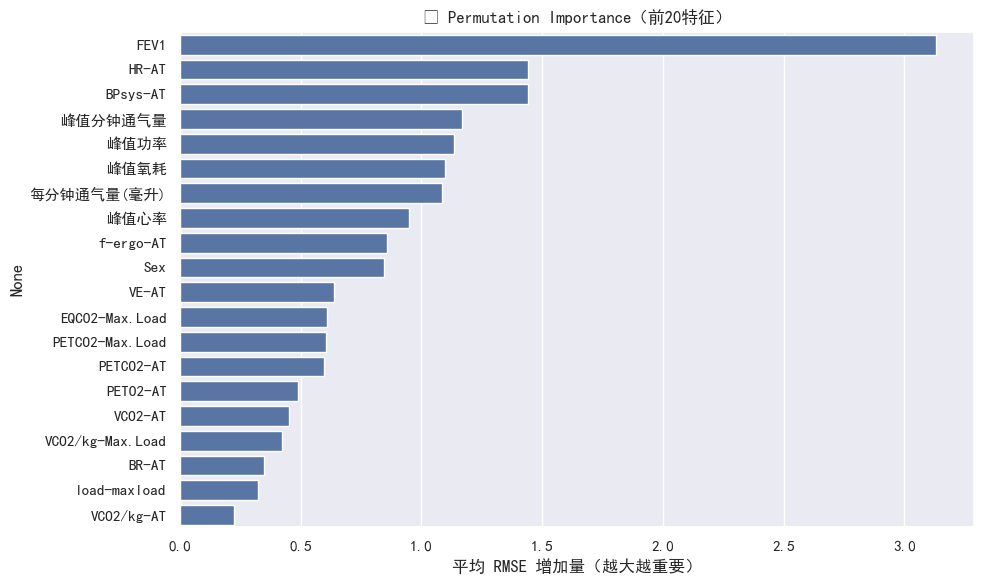

In [10]:
# permutation importance分析变量贡献度
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经 fit 过 stack_model
# 并且 X_final 是用于训练的最终特征集（已经插补、标准化、特征选择）

# Permutation Importance（使用训练数据）
result = permutation_importance(
    stack_model, X_final, y,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error'
)

# 结果整理
importances = pd.Series(result.importances_mean, index=X_final.columns)
importances = importances.sort_values(ascending=False)

# 打印前几项
print("📊 Permutation Importance 前10变量：")
print(importances.head(10))

# 可视化
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20])
plt.title("🎯 Permutation Importance（前20特征）")
plt.xlabel("平均 RMSE 增加量（越大越重要）")
plt.tight_layout()
plt.show()


In [11]:
# 计算生物年龄与加速年龄
# 注意：确保 y_pred 是模型对 df 的 X_final 的预测结果，顺序对齐

# 添加预测年龄列（chAge）
df["chAge"] = y_pred

# 添加加速年龄列（acAge = 预测年龄 - 实际年龄）
df["acAge"] = df["chAge"] - df["Age"]

# 检查新列
print(df[["Age", "chAge", "acAge"]].head())


    Age      chAge     acAge
0  59.0  57.712855 -1.287145
1  64.0  58.769486 -5.230514
2  44.0  42.600363 -1.399637
3  55.0  56.575047  1.575047
4  57.0  50.680951 -6.319049


In [12]:
CDD2=df.copy()
# 纳入疾病诊断并进行分类，统计每一类的样本量
# 假设 CDD1 已经加载为 DataFrame
# 确保 CDD1.index 是和 df.index 一致的（或者是包含的子集）

# 将诊断列对齐后添加到 df
df["诊断"] = CDD1["诊断"]

# （可选）检查对齐情况
# print(df[["Age", "chAge", "acAge", "诊断"]].head())

import pandas as pd

# 假设你的 DataFrame 已经存在，且诊断列名为 '诊断'
# df = pd.read_csv('your_data.csv')  # 如果需要的话

# 1. 预先定义想要拆出的分类（示例）
categories = [
    '胸闷',
    '胸痛查因',
    '心悸待查',
    '心律失常',
    '头痛',
    '阵发性心房纤颤',
    '高血压',
    '2型糖尿病',
    '冠状动脉粥样硬化性心脏病',
    '健康查体',
    '心血管性神经官能症',
    '不稳定型心绞痛',
    '中央型房间隔缺损',
    '室间隔缺损修补术后',
    '卵圆孔未闭封堵术后',
    '心电图异常',
    '高脂血症',
    '高同型半胱氨酸血症',
    '健康体检',
    '心悸',
    '体检',
]

# 2. 对每个分类，检查诊断文本中是否包含该关键词，包含则标记1，否则0
for cat in categories:
    df[cat] = df['诊断'].str.contains(cat, na=False).astype(int)

# 3. “缺失”列：原诊断为空或全空白时标记1，否则0
df['缺失'] = (df['诊断'].isna() | (df['诊断'].str.strip() == '')).astype(int)

# 4. “特殊”列：原诊断非空，但不包含任何预设分类时标记1，否则0
#    —— 即：缺失=0 且 所有 categories 列之和为0
df['特殊'] = ((df['缺失'] == 0) & (df[categories].sum(axis=1) == 0)).astype(int)

# 要统计的所有列名
count_cols = categories + ['缺失', '特殊']

# 统计每一列中值为1的行数
counts = df[count_cols].sum().sort_values(ascending=False)

# 输出结果
counts



缺失              733
高血压             457
胸痛查因            302
胸闷              263
特殊              233
冠状动脉粥样硬化性心脏病    188
高脂血症            179
心悸              161
心电图异常           125
健康查体            120
心律失常             97
2型糖尿病            46
心悸待查             37
心血管性神经官能症        30
体检               17
中央型房间隔缺损         14
高同型半胱氨酸血症        10
健康体检              8
头痛                7
不稳定型心绞痛           3
卵圆孔未闭封堵术后         2
室间隔缺损修补术后         1
阵发性心房纤颤           1
dtype: int64

In [17]:
CDD3=df.copy()
# 按疾病划分计算加速年龄差异显著性
from scipy.stats import ttest_ind, mannwhitneyu

results = []

for cat in categories + ['特殊']:  # 不含“缺失”，那是 NaN 情况
    group1 = df[df[cat] == 1]['acAge']
    group0 = df[df[cat] == 0]['acAge']
    
    if len(group1) > 5 and len(group0) > 5:  # 保证样本量
        # 正态分布不确定时建议用非参数检验
        stat, pval = mannwhitneyu(group1, group0, alternative='two-sided')
        results.append({
            '分类': cat,
            '正例人数': len(group1),
            '阴性人数': len(group0),
            '正例acAge均值': group1.mean(),
            '阴性acAge均值': group0.mean(),
            'P值': pval
        })

results_df = pd.DataFrame(results).sort_values('P值')
results_df

,分类,正例人数,阴性人数,正例acAge均值,阴性acAge均值,P值
7,冠状动脉粥样硬化性心脏病,188,2383,-2.774645,0.264229,1.532603e-07
1,胸痛查因,302,2269,1.692815,-0.177702,1.559379e-05
12,高脂血症,179,2392,-1.730402,0.174652,2.412771e-03
0,胸闷,263,2308,-1.003793,0.161188,7.102431e-03
5,高血压,457,2114,-0.923252,0.250686,9.424895e-03
8,健康查体,120,2451,-1.400915,0.112662,1.118335e-02
11,心电图异常,125,2446,1.255037,-0.019973,8.561809e-02
14,健康体检,8,2563,-4.196605,0.055247,1.522088e-01
16,体检,17,2554,-2.442705,0.058556,1.529809e-01
9,心血管性神经官能症,30,2541,1.706212,0.022369,1.842123e-01


✅ 健康查体样本数: 120, 均值: -1.40
❗ 其他人群样本数: 2451, 均值: 0.11
📊 Mann–Whitney U 检验 P 值: 0.0112


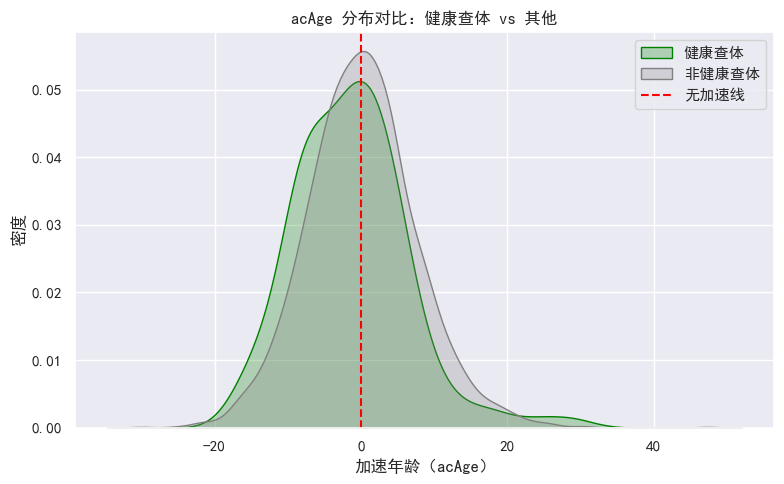

In [18]:
# 单独比较各疾病人群与‘健康查体’人群的年龄加速差异
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# 分组
group_healthy = df[df["健康查体"] == 1]["acAge"]
group_others = df[df["健康查体"] == 0]["acAge"]

# 非参数检验
stat, pval = mannwhitneyu(group_healthy, group_others, alternative='two-sided')

# 打印统计结果
print(f"✅ 健康查体样本数: {len(group_healthy)}, 均值: {group_healthy.mean():.2f}")
print(f"❗ 其他人群样本数: {len(group_others)}, 均值: {group_others.mean():.2f}")
print(f"📊 Mann–Whitney U 检验 P 值: {pval:.4f}")

# 可视化
plt.figure(figsize=(8,5))
sns.kdeplot(group_healthy, label='健康查体', fill=True, color='green')
sns.kdeplot(group_others, label='非健康查体', fill=True, color='gray')
plt.axvline(0, color='red', linestyle='--', label='无加速线')
plt.title("acAge 分布对比：健康查体 vs 其他")
plt.xlabel("加速年龄（acAge）")
plt.ylabel("密度")
plt.legend()
plt.tight_layout()
plt.show()

📈 acAge 与 d_VO2peak 的相关系数：-0.217


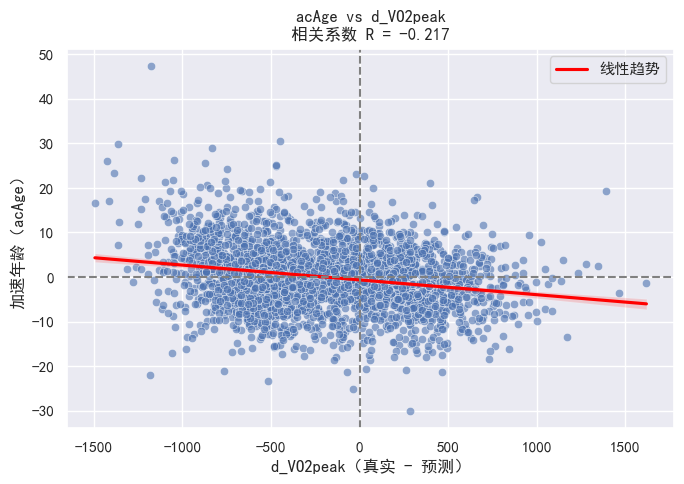

In [30]:
# 引入湘雅队列研究结果的CRF计算，得到CRF变异，计算与加速年龄相关性
# 选取变量
cols = ['Age', 'Sex', 'Weight', 'Height', '卧位心室率', '峰值心率', '峰值氧耗']
df_subset = df[cols]

# 单位换算，L/min -> mL/min
df_subset['VO2peak_true'] = df_subset['峰值氧耗'] * 1000  # 新建一列也好，避免覆盖

# 计算预测值
# df['VO2peak_pred'] = (
#     236.68
#     - 504.64 * df['Sex']
#     + 21.23 * df['Weight']
#     - 14.31 * df['Age']
#     + 9.46 * df['Height']
# )
df_subset['VO2peak_pred_1'] = (
    1532.580
    - 328.244 * df_subset['Sex']
    - 9.951 * df_subset['Age']
    + 11.593 * df_subset['Weight']
)

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. 添加 d_VO2peak 列
df_subset["d_VO2peak"] = df_subset["VO2peak_true"] - df_subset["VO2peak_pred_1"]

# ✅ 2. 合并到 df（按索引对齐）
df["d_VO2peak"] = df_subset["d_VO2peak"]

# ✅ 3. 计算相关性
corr = df["acAge"].corr(df["d_VO2peak"])
print(f"📈 acAge 与 d_VO2peak 的相关系数：{corr:.3f}")

# ✅ 4. 画散点图
plt.figure(figsize=(7,5))
sns.scatterplot(x="d_VO2peak", y="acAge", data=df, alpha=0.6)
sns.regplot(x="d_VO2peak", y="acAge", data=df, scatter=False, color='red', label='线性趋势')
plt.title(f"acAge vs d_VO2peak\n相关系数 R = {corr:.3f}")
plt.xlabel("d_VO2peak（真实 - 预测）")
plt.ylabel("加速年龄（acAge）")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()




====== 👤 性别分组：女性 ======


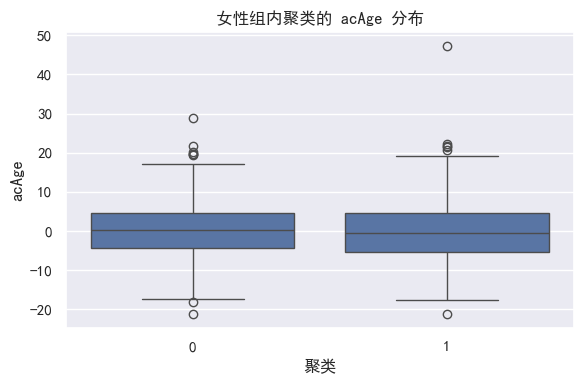

cluster              0           1
acAge         0.363670   -0.036549
FEV1          2.614457    2.118656
HR-AT       126.672481  117.924644
BPsys-AT    130.209302  138.745418
峰值分钟通气量      43.004767   29.501344
峰值功率         95.674419   65.368635
峰值氧耗          1.348818    0.955071
每分钟通气量(毫升)    1.509554    1.014725
峰值心率        156.139535  134.260692
f-ergo-AT    24.591085   24.755601
acAge         0.363670   -0.036549

====== 👤 性别分组：男性 ======


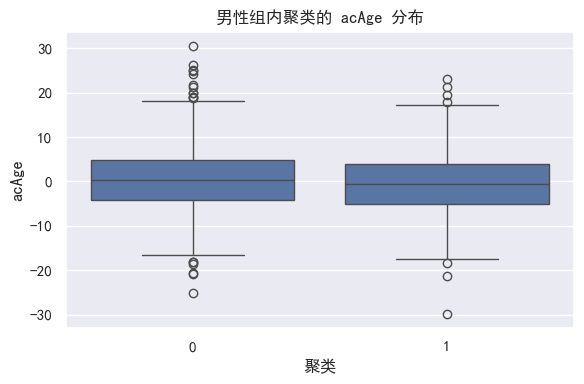

cluster              0           1
acAge         0.393653   -0.618231
FEV1          2.872637    3.577039
HR-AT       112.274571  124.706507
BPsys-AT    145.959438  148.521912
峰值分钟通气量      41.280140   60.044396
峰值功率        104.219969  151.540505
峰值氧耗          1.376378    2.006295
每分钟通气量(毫升)    1.501841    2.283559
峰值心率        132.413417  156.375830
f-ergo-AT    22.663027   22.643293
acAge         0.393653   -0.618231


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 特征列表（去掉 Sex 本身）
features = [
    'acAge',
    'FEV1', 'HR-AT', 'BPsys-AT', '峰值分钟通气量', '峰值功率',
    '峰值氧耗', '每分钟通气量(毫升)', '峰值心率', 'f-ergo-AT'
]

# ✅ 按性别分组
for sex_value, sex_label in zip([0, 1], ['女性', '男性']):
    print(f"\n====== 👤 性别分组：{sex_label} ======")
    df_sex = df[df["Sex"] == sex_value][features].dropna()
    
    # 标准化
    X_scaled = StandardScaler().fit_transform(df_sex)
    
    # 聚类（k=2）
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # 加入聚类标签
    df_temp = df[df["Sex"] == sex_value].copy()
    df_temp = df_temp.loc[df_sex.index]
    df_temp["cluster"] = labels

    # 📊 可视化 acAge 在每个聚类的分布
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="cluster", y="acAge", data=df_temp)
    plt.title(f"{sex_label}组内聚类的 acAge 分布")
    plt.xlabel("聚类")
    plt.ylabel("acAge")
    plt.tight_layout()
    plt.show()
    
    # 📈 输出每类均值
    print(df_temp.groupby("cluster")[features + ["acAge"]].mean().T)


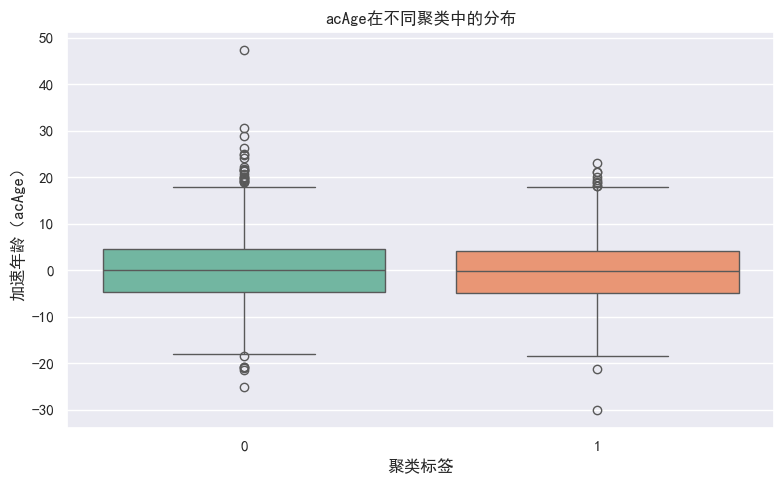

📊 各聚类中变量均值：
cluster              0           1
acAge         0.196746   -0.277404
FEV1          2.419962    3.443732
HR-AT       119.127190  121.987132
BPsys-AT    137.046458  147.763787
峰值分钟通气量      35.825506   56.351774
峰值功率         82.105103  142.072610
峰值氧耗          1.152292    1.879566
每分钟通气量(毫升)    1.254608    2.125055
峰值心率        140.387662  151.460478
f-ergo-AT    24.323686   22.504044
Sex           0.264280    0.962316


In [36]:
# 设置聚类数
n_clusters = 2  # 你可以根据上图修改

# 聚类
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 添加回 df
df_cluster["cluster"] = cluster_labels
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cluster, x='cluster', y='acAge', palette='Set2')
plt.title("acAge在不同聚类中的分布")
plt.xlabel("聚类标签")
plt.ylabel("加速年龄（acAge）")
plt.tight_layout()
plt.show()
print("📊 各聚类中变量均值：")
print(df_cluster.groupby('cluster')[features].mean().T)


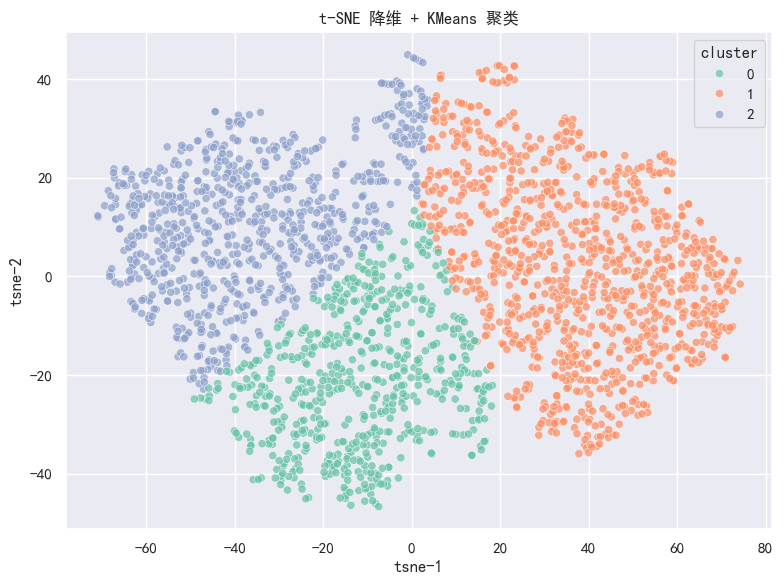

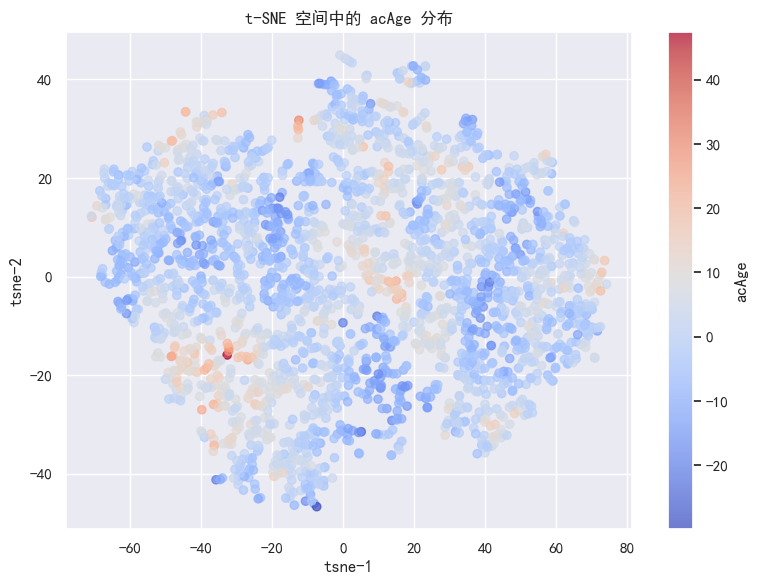

          count      mean       std        min       25%       50%       75%  \
cluster                                                                        
0         617.0  0.793228  8.248954 -29.974846 -4.261721  1.145621  5.624310   
1        1027.0  0.403884  6.723877 -21.298883 -4.022617  0.379073  4.735582   
2         773.0 -1.171748  6.994519 -20.716831 -5.841536 -1.667372  2.691594   

               max  
cluster             
0        47.371131  
1        23.038806  
2        30.620887  


In [44]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ 特征列表（不含 Sex，本轮先不考虑性别）
features_tsne = [
    'acAge',
    'FEV1', 'HR-AT', 'BPsys-AT', '峰值分钟通气量', '峰值功率',
    '峰值氧耗', '每分钟通气量(毫升)', '峰值心率', 'f-ergo-AT'
]

# ✅ 去除缺失
df_tsne = df[features_tsne].dropna()
X = df_tsne.values

# ✅ 标准化
X_scaled = StandardScaler().fit_transform(X)

# ✅ t-SNE 降维
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# ✅ 聚类（k=3 是推荐起点，你可以试 2~5）
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_embedded)

# ✅ 合并结果
df_tsne["tsne-1"] = X_embedded[:, 0]
df_tsne["tsne-2"] = X_embedded[:, 1]
df_tsne["cluster"] = labels

# ✅ 可视化：按聚类画 t-SNE 图 + 显示 acAge 分布
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="tsne-1", y="tsne-2", hue="cluster", palette="Set2", alpha=0.7)
plt.title("t-SNE 降维 + KMeans 聚类")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# ✅ t-SNE 空间中 acAge 映射为颜色的散点图
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_tsne["tsne-1"], df_tsne["tsne-2"], c=df_tsne["acAge"], cmap="coolwarm", alpha=0.7)
plt.colorbar(sc, label="acAge")
plt.title("t-SNE 空间中的 acAge 分布")
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
plt.tight_layout()
plt.show()
# ✅ 可选：每个聚类 acAge 平均值
print(df_tsne.groupby("cluster")["acAge"].describe())
